# Analysis of the data of the center of mass of a bubble in a biphasic flow simulation with OpenFOAM

We have the raw data of the $z$ value of the center of mass through time of a bubble in a column of water. The data was obtained with the use of filters in paraview and the simulations were done in OpenFOAM. 

There are values for the center of mass for four types of mesh (S->Simple mesh, O-> Octagonal core mesh, C->Square core mesh, W-> Repeating wedge mesh). The SOC meshes are simple in the way that all the domain is calculated, where the W mesh uses the angular geometry of the column to save computayional cost. The W mesh as an ideal case deserves special atention as the idealization of the model can stray it from reality.

We'll only treat the fourth refinement level in the SOC meshes, and in the case of the W mesh we'll look at the three posible wedge angles taken (1,2,3 degrees).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
sns.set_theme()

## SOC meshes

We import the data for the S,O,C meshes for refinement levels 1,2,3,4. Unfotunately, after some inspection it was decided that more resolution in the measurements in the refinement level 4 was needed becasue the bubble started to do a expand/contract motion which would be obserbable in the velocity but because the derivative taken for that is numerical, more samples were needed. For this we have a second csv file with more data samples.

In [60]:
cm_sco123 = pd.read_csv('dataCMsco.txt')

In [61]:
cm_sco123.drop(['S4', 'O4', 'C4'], axis=1, inplace=True)

In [62]:
cm_sco4 = pd.read_csv('dataCMcsoplus.txt')

In [63]:
cm_soc = pd.DataFrame()

In [64]:
for col in cm_sco123.columns:
    for i in range(len(cm_sco123)):
        cm_soc = cm_soc.append({'t': 0.34*(i/len(cm_sco123)), 'z': cm_sco123[col].iloc[i], 'mesh': col[0], 'ref': int(col[1])}, ignore_index=True)

In [65]:
for col in cm_sco4.columns:
    for i in range(len(cm_sco4)):
        cm_soc = cm_soc.append({'t': 0.34*(i/len(cm_sco4)), 'z': cm_sco4[col].iloc[i], 'mesh': col[0], 'ref': int(col[1])}, ignore_index=True)

Height of the center of mass by mesh type and refinement level.

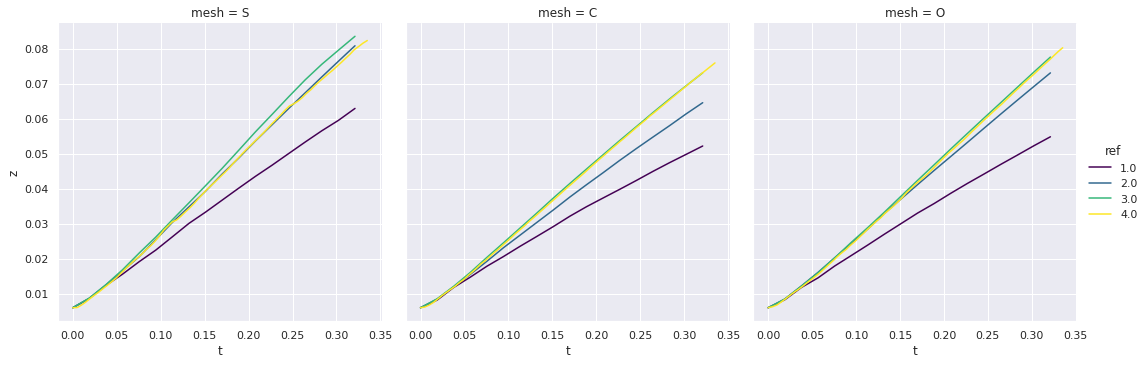

In [83]:
sns.relplot(data=cm_soc, x='t', y='z', hue='ref', col='mesh',kind='line', palette='viridis')

### Velocity and terminal velocity

In [66]:
cm_sco123 = cm_sco123.diff()/(0.34/len(cm_sco123))

In [67]:
cm_sco4 = cm_sco4.diff()/(0.34/len(cm_sco4))

In [69]:
cm_soc_u = pd.DataFrame()

In [70]:
for col in cm_sco123.columns:
    for i in range(len(cm_sco123)):
        cm_soc_u = cm_soc_u.append({'t': 0.34*(i/len(cm_sco123)), 'uz': cm_sco123[col].iloc[i], 'mesh': col[0], 'ref': int(col[1])}, ignore_index=True)

In [71]:
for col in cm_sco4.columns:
    for i in range(len(cm_sco4)):
        cm_soc_u = cm_soc_u.append({'t': 0.34*(i/len(cm_sco4)), 'uz': cm_sco4[col].iloc[i], 'mesh': col[0], 'ref': int(col[1])}, ignore_index=True)

Vertical velocity of the center of mass by mesh type and refinement level. The gain in definition of the curve in refinement level 4 is quite noticeable.

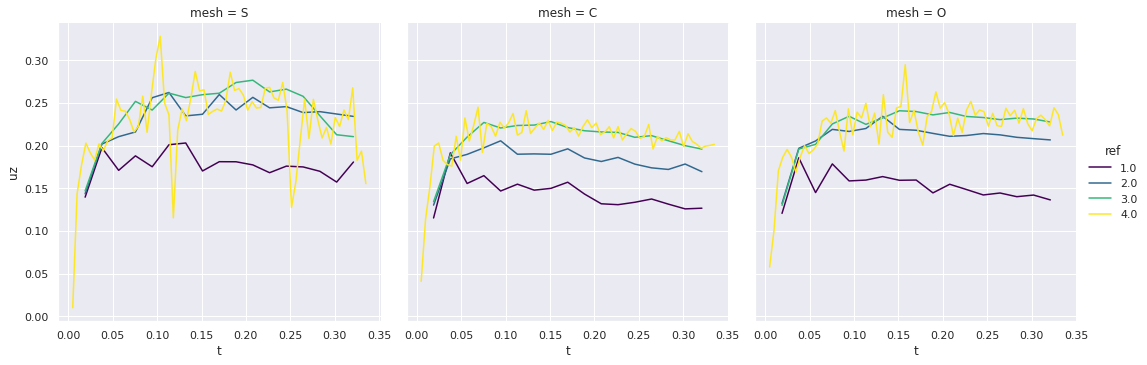

In [82]:
sns.relplot(data=cm_soc_u, x='t', y='uz', hue='ref', col='mesh',kind='line', palette='viridis')

We compute the terminal velocity by taking the average velocity after 0.1s have passed in the simulation, because the bubble needs time to accelerate. In an ideal case the bubble stays on a constant velocity as $t>>0$ (terminal velocity), but in this more reslistic case  the bubble has other forces pressing and pullin o it and becasue of that we have some weird behaviors. 
We can see the terminal velocities by mesh and ref level in a heatmap.

In [104]:
terminal_SOC = cm_soc_u[cm_soc_u['t'] > 0.10].groupby(['mesh','ref']).mean()['uz'].unstack()

<AxesSubplot:xlabel='ref', ylabel='mesh'>

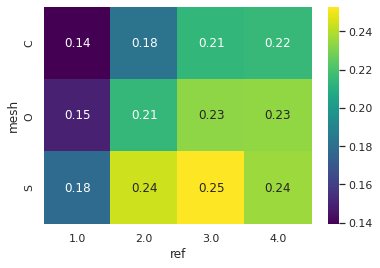

In [107]:
sns.heatmap(terminal_SOC, annot=True, cmap='viridis')

## Wedge mesh

We repeat the same process for the wedge meshes.

In [85]:
cm_w_wide = pd.read_csv('dataCMiplus.txt')

In [87]:
cm_w = pd.DataFrame()

In [89]:
for col in cm_w_wide.columns:
    for i in range(len(cm_w_wide)):
        cm_w = cm_w.append({'t': 0.34*(i/len(cm_w_wide)), 'z': cm_w_wide[col].iloc[i], 'angle': int(col[0])}, ignore_index=True)

Height of the center of mass on the bubble through time

<AxesSubplot:xlabel='t', ylabel='z'>

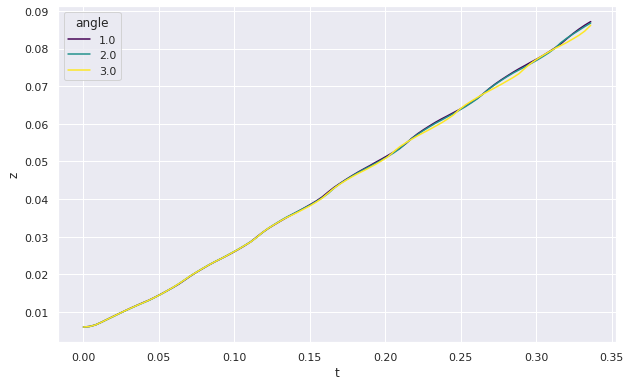

In [90]:
plt.figure(figsize=(10,10/1.618))
sns.lineplot(data=cm_w, x='t', y='z', hue='angle', palette='viridis')

### Velocity and terminal velocity

In [91]:
cm_w_wide = cm_w_wide.diff()/(0.34/len(cm_w_wide))

In [92]:
cm_w_diff = pd.DataFrame()

In [93]:
for col in cm_w_wide.columns:
    for i in range(len(cm_w_wide)):
        cm_w_diff = cm_w_diff.append({'t': 0.34*(i/len(cm_w_wide)), 'uz': cm_w_wide[col].iloc[i], 'angle': int(col[0])}, ignore_index=True)

As the wedge mesh saves a lot of computational power, we have $\sim 10$ times more resolution in this meshes, and the oscilations are more defined and evident yet there's still some diference between angles.

<AxesSubplot:xlabel='t', ylabel='uz'>

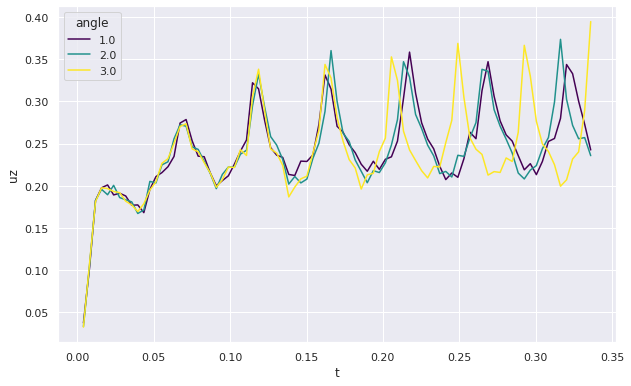

In [95]:
plt.figure(figsize=(10,10/1.618))
sns.lineplot(data=cm_w_diff, x='t', y='uz', hue='angle', palette='viridis')

The terminal velocities are more or less the same but they are somewhat far from the SOC cases.

In [103]:
cm_w_diff[cm_w_diff['t']>0.176].groupby('angle').mean()['uz']

angle
1.0    0.258721
2.0    0.256985
3.0    0.254117
Name: uz, dtype: float64